# **Resume Scoring**

**Meghna Lohani 16BCE1395**

**Aman Sharma 16BCE1224**

# **Workflow**

1.Creating corpus using Sketch Engine

2.Creating word embedding using Genism , Word2Vec

3.Preprocessing

4.Removing common words that are not required

5.Creating phrases of words that frequently occur togther (bigrams)

6.Building word2vec model

7.Extracting resumes (using PyPDF) and converting to string

8.Building candidate profile using model.most_similar(skills), where skills is an array of required skills

9.Creating a matcher using Spacy to match the wods in resume to most_similar(skills)

10.Printing and visualizing the candidate profile

# **Creating Corpus using sketch Engine**

We used SketchEngine to create a corpus, wikipedia pages were given as input

In [ ]:
from PIL import Image

# **Creating word embedding**

In [ ]:
from gensim.models import Word2Vec
import string
import re
from nltk.corpus import stopwords
with open('/content/skills.txt',encoding="utf8") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]

In [ ]:
content[1]

'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.'

In [ ]:
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.phrases import Phraser, Phrases

# **Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
x=[]
for line in content:
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    x.append(words)

In [ ]:
texts=x

In [ ]:
print(texts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [ ]:
print(len(texts))
texts=texts

316


# **Creating bigrams**

In [ ]:
common_terms = ["of", "with", "without", "and", "or", "the", "a"]
x=texts
# Create the relevant phrases from the list of sentences:
phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences
all_sentences = list(bigram[x])
model=gensim.models.Word2Vec(all_sentences,size=5000,min_count=2,workers=4,window=4)
model.save("final.model")
wrds=list(model.wv.vocab)
print(len(wrds))

1286


# **Testing**

In [ ]:
z=model.wv.most_similar("machine_learning")

In [ ]:
print(z)

[('software', 0.17674210667610168), ('data', 0.16679146885871887), ('deep_learning', 0.16546928882598877), ('information', 0.15939128398895264), ('may', 0.1477000117301941), ('data_science', 0.13868102431297302), ('system', 0.1364508867263794), ('language', 0.13599902391433716), ('models', 0.1353144645690918), ('development', 0.13287463784217834)]


# **Resume Parsing**

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 4.7 MB/s 


In [ ]:
import PyPDF2
import os
import collections
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


**Reading Resumes from folder**

In [ ]:
mypath="/content/Resume"
#Path for the files
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

**Function to words from resume**

In [ ]:
import collections
def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    for i in c:
        #page
        page = read_pdf.getPage(i)
        page_content = page.extractText()
    return (page_content.encode('utf-8'))

In [ ]:
sim_words=[k[0] for k in model.wv.most_similar("machine_learning")]

In [ ]:
def create_bigram(words):
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    x=words.split()
# Create the relevant phrases from the list of sentences:
    phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
    bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
    all_sentences = list(bigram[x])

**Function to build candidate profile**

In [ ]:
def create_profile(file):
    model=Word2Vec.load("final.model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "")
    text = text.lower()
    #print(text)
    #text=create_bigram(text)
    #print(text)
    #below is the csv where we have all the keywords, you can customize your own
    #keyword_dictionary = pd.read_csv(r'C:\Users\dell\Desktop\New folder\ML_CS\NLP\technical_skills.csv')
    stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
    NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
    ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
    DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
    #R = [nlp(text) for text in keyword_dictionary['R Language'].dropna(axis = 0)]
    python = [nlp(text[0]) for text in model.wv.most_similar("python")]
    Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]
    print("*******************************************")
    #print(stats_words,NLP_words)
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats)
    matcher.add('NLP', None, *NLP)
    matcher.add('ML', None, *ML)
    matcher.add('DL', None, *DL)
    matcher.add('Python', None, *python)
    matcher.add('DE', None, *Data_Engineering)
    doc = nlp(text)

    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode I
        span = doc[start : end]               # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    print("KEYWORDS")
    print(keywords)
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    print("********************DF********************")
    print(df)
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
    
       
    name = filename.split('_')
    print(name)
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    print("******************DATAF**************")
    print(dataf)

    return(dataf)


**Code to execute the above functions**

In [ ]:
#Code to execute the above functions 
final_db=pd.DataFrame()
i=0
while i < len(onlyfiles):
    file=onlyfiles[i]
    # print(file)
    dat=create_profile(file)
    final_db=final_db.append(dat)
    i+=1
    #print(final_db)

*******************************************
KEYWORDS
DL using (4)
********************DF********************
  Keywords_List
0  DL using (4)
['VAISHALI BIJOY']
******************DATAF**************
   Candidate Name Subject Keyword Count
0  vaishali bijoy      DL  using      4
*******************************************
KEYWORDS
DL using (5)
NLP deep (1)
DE learning (1)
********************DF********************
     Keywords_List
0     DL using (5)
1     NLP deep (1)
2  DE learning (1)
['Phoebe Buffay']
******************DATAF**************
  Candidate Name Subject    Keyword Count
0  phoebe buffay      DL     using      5
1  phoebe buffay     NLP      deep      1
2  phoebe buffay      DE  learning      1
*******************************************
KEYWORDS
ML data (1)
NLP data (1)
Stats data (1)
DL data (1)
Python data (1)
DL using (3)
********************DF********************
     Keywords_List
0      ML data (1)
1     NLP data (1)
2   Stats data (1)
3      DL data (1)
4  Python da

**Counting words under each category and building the candidate profile**

In [ ]:
#Code to count words under each category and visualize it through MAtplotlib
final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
final_db2.reset_index(inplace = True)
final_db2.fillna(0,inplace=True)
candidate_data = final_db2.iloc[:,1:]
candidate_data.index = final_db2['Candidate Name']
#the candidate profile in a csv format
cand=candidate_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

,Candidate Name,DE,DL,ML,NLP,Python,Stats
0,amansharma,3.0,3.0,3.0,4.0,6.0,5.0
1,chandler,0.0,1.0,0.0,0.0,0.0,0.0
2,meghnalohani,0.0,2.0,1.0,1.0,1.0,1.0
3,phoebe buffay,1.0,1.0,0.0,1.0,0.0,0.0
4,vaishali bijoy,0.0,1.0,0.0,0.0,0.0,0.0


# **Visualizing by matplotlib**

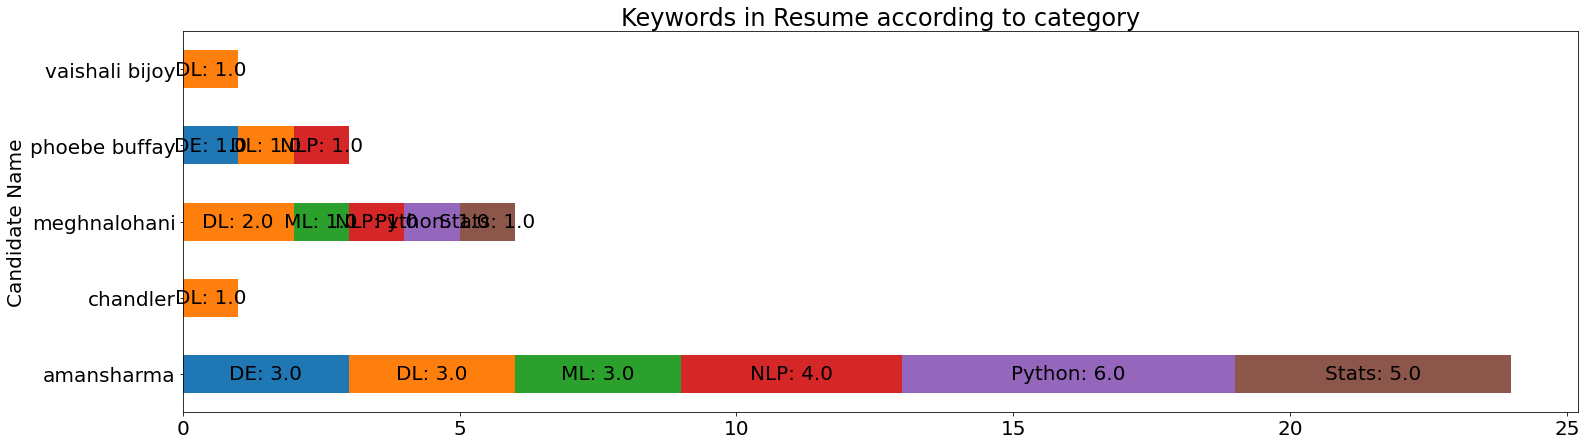

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
ax = candidate_data.plot.barh(title="Keywords in Resume according to category", legend=False, figsize=(25,7), stacked=True)
skills = []
for j in candidate_data.columns:
    for i in candidate_data.index:
        skill = str(j)+": " + str(candidate_data.loc[i][j])
        skills.append(skill)
patches = ax.patches
for skill, rect in zip(skills, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center')
plt.show()

# **References**

    1.https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

    2.https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/

    3.https://app.sketchengine.eu/
